# Challenge Problem 4
## Reese De Wind

In [3]:
import warnings 
warnings.filterwarnings('ignore')
import networkx as nx
import matplotlib.pyplot as plt
import selenium as s
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
#from selenium.remote import connect                                                                                                                          

# Part 1

#### 30 actors
as you can see I accidently included 31 total, after running it I didn't want to re-run everything so I left it as is, however you could remove danny mcbride without affecting any of the other connections as he ends up being a loose node anyway.

In [4]:
actor_list = ["Michael fassbender", "Christopher Waltz", "Robert De Niro", "Chris Pratt","Zoe Saldana", "Sam Worthington","John Noble", "Johnny Depp", "Leonardo Dicaprio","Tom Hardy"
              , "Robert De Niro", "Audrey Hepburn","Natalie Portman", "Sharlto Copley", "Jason Cope", "Idris elba", "Dominic Monaghan", "Heath Ledger","Christopher Walken", "jack nicholson"
              ,"Edward Norton","Sean Connery", "Simon Pegg", "Nick Frost", "Will Ferrell", "John Reilly", "Danny Mcbride", "James Franco", "Ryan Reynolds", "Mel Gibson","Tom Hanks"]

In [5]:
print(len(actor_list))

31


# Part 2 - creating the graph

#### try it out yourself!
If you want to test this out yourself you have to install two things, a chrome webdriver which can be found here https://sites.google.com/a/chromium.org/chromedriver/downloads and selenium so that the import in the first cell will work correctly with 'pip install selenium', or pip3 depending on what version of python you're using. 

If the chrome driver does not automatically install to the correct directory, you can point to it by adding this line to the top of the function. Or you can add it to your path.

System.setProperty("webdriver.chrome.driver", "/path/to/chromedriver");

#### use the pre-created list
if you can't run this or don't want to wait for it to go through 450 iterations (because the driver I used isn't headless it takes a while, it would be significantly faster without a gui.) I've pasted in the results of running the function below, so you can simply set saved_list directly to the printed dictionary.




In [55]:
saved_list = {'Mel Gibson (I)': ['Heath Ledger', 'Will Ferrell (I)'], 'Jason Cope': ['Tom Hardy (I)', 'Sharlto Copley', 'Idris elba'], 'Audrey Hepburn (I)': ['Sean Connery'], 'Will Ferrell (I)': ['Chris Pratt (I)', 'Johnny Depp', 'Natalie Portman', 'Christopher Walken', 'James Franco', 'Ryan Reynolds (I)', 'Mel Gibson (I)'], 'Sam Worthington': ['Zoe Saldana', 'James Franco'], 'Edward Norton (I)': ['Robert De Niro', 'Robert De Niro', 'Natalie Portman', 'James Franco'], 'Chris Pratt (I)': ['Zoe Saldana', 'Will Ferrell (I)'], 'Idris elba': ['Michael fassbender', 'Zoe Saldana', 'Tom Hardy (I)', 'Natalie Portman', 'Jason Cope', 'Christopher Walken', 'Simon Pegg'], 'jack nicholson (I)': ['Robert De Niro', 'Leonardo Dicaprio', 'Robert De Niro', 'Natalie Portman'], 'Leonardo Dicaprio': ['Christopher Waltz', 'Robert De Niro', 'Zoe Saldana', 'Johnny Depp', 'Tom Hardy (I)', 'Robert De Niro', 'Christopher Walken', 'jack nicholson (I)', 'Tom Hanks'], 'Tom Hanks': ['Zoe Saldana', 'Leonardo Dicaprio', 'Christopher Walken'], 'Robert De Niro': ['Leonardo Dicaprio', 'Natalie Portman', 'Christopher Walken', 'jack nicholson (I)', 'Edward Norton (I)', 'Sean Connery', 'James Franco', 'Leonardo Dicaprio', 'Natalie Portman', 'Christopher Walken', 'jack nicholson (I)', 'Edward Norton (I)', 'Sean Connery', 'James Franco'], 'James Franco': ['Michael fassbender', 'Christopher Waltz', 'Robert De Niro', 'Zoe Saldana', 'Sam Worthington', 'Robert De Niro', 'Natalie Portman', 'Edward Norton (I)', 'Will Ferrell (I)'], 'Sean Connery': ['Robert De Niro', 'Robert De Niro', 'Audrey Hepburn (I)', 'Christopher Walken'], 'John Reilly (I)': [], 'Christopher Waltz': ['Michael fassbender', 'Leonardo Dicaprio', 'James Franco'], 'Christopher Walken': ['Robert De Niro', 'Johnny Depp', 'Leonardo Dicaprio', 'Robert De Niro', 'Idris elba', 'Sean Connery', 'Will Ferrell (I)', 'Tom Hanks'], 'Simon Pegg': ['Zoe Saldana', 'Tom Hardy (I)', 'Idris elba', 'Nick Frost (I)'], 'Tom Hardy (I)': ['Leonardo Dicaprio', 'Jason Cope', 'Idris elba', 'Simon Pegg'], 'Natalie Portman': ['Michael fassbender', 'Robert De Niro', 'Robert De Niro', 'Idris elba', 'jack nicholson (I)', 'Edward Norton (I)', 'Will Ferrell (I)', 'James Franco'], 'Johnny Depp': ['Zoe Saldana', 'Leonardo Dicaprio', 'Heath Ledger', 'Christopher Walken', 'Will Ferrell (I)'], 'Zoe Saldana': ['Chris Pratt (I)', 'Sam Worthington', 'Johnny Depp', 'Leonardo Dicaprio', 'Idris elba', 'Simon Pegg', 'James Franco', 'Tom Hanks'], 'Dominic Monaghan': ['John Noble (I)', 'Ryan Reynolds (I)'], 'Michael fassbender': ['Christopher Waltz', 'Natalie Portman', 'Idris elba', 'James Franco'], 'John Noble (I)': ['Dominic Monaghan'], 'Heath Ledger': ['Johnny Depp', 'Mel Gibson (I)'], 'Danny Mcbride (I)': [], 'Nick Frost (I)': ['Simon Pegg'], 'Sharlto Copley': ['Jason Cope'], 'Ryan Reynolds (I)': ['Dominic Monaghan', 'Will Ferrell (I)']}

## what does this do?
I've commented the code below fairly heavily if you want to walk through it line by line, but all it does is bring up a web browser and then read through the html behind it. It then inputs text where necessary and click all the right buttons. Once it gets to a page comparing two actors it simply checks how many actor spans exist in the html, if there are 2 then it must be actor -> movie -> actor, if there are more it will look something like actor -> movie -> actor -> movie -> actor etc. We can tell they're connected by simply counting the number of spans that exist.


In [56]:


def getBaconNumber(list):
    dict_of_lists = {}
    driver = webdriver.Chrome() #get our webdriver
    driver.get("https://oracleofbacon.org/movielinks.php") # get the html of the oracle of bacon site
    index1 = 0
    index2 = 0
    total = len(list)
    for i in list:
        dict_of_lists[i] = [] #create a dictionary with each actor as a key and an empty list as their value
    print("Starting...")
    while(index1 < total):
        while(index2 < total):
            person1 = list[index1]
            person2 = list[index2]
            if index2 == index1: #don't match actors with themselves!
                index2 += 1
                continue
            first = driver.find_element_by_css_selector("#searchbox > input[name='a']") #use a css selector to find box1
            second = driver.find_element_by_css_selector("#searchbox > input[name='b']") #box 2
            submit_button = driver.find_element_by_css_selector('input[value="Find link"]')# the 'find link' button
            #clear out whatever is in the actor1 and 2 boxes
            first.clear()
            second.clear()
            #fill the boxes back in with the two currently selected actors
            first.send_keys(person1)
            second.send_keys(person2)
            #hit the submit button
            submit_button.send_keys(Keys.RETURN)
            try:
                #this checks for a specific dom element, if it exists that means we're on the actor not found page
                actor_not_found = driver.find_element_by_css_selector("div#main > i").text
                #if the previous call often throws the exception that's caught below, if an actor wasn't found let us know
                print("Made it here!")
                #add an (I) to the actors name if they're not found, usually this will fix the problem
                if actor_not_found == person1:
                    list[index1] = person1 + " (I)"
                if actor_not_found == person2:
                    list[index2] = person2 + " (I)"
                continue
                #if they still aren't found after the (I) it will infinitely loop adding (I)'s to their name
                #this is easily correctable but I didn't get around to doing it, as all of mine are spelled correctly
            except s.common.exceptions.NoSuchElementException:
                pass
            actors = driver.find_elements_by_css_selector("span[class='actor']"); #find the number of actors on the page
            if len(actors) == 2: #if there are exactly 2 actors they're linked by 1 movie, if there are more they're not
                dict_of_lists[person1].append(person2)
            index2 += 1
        index1 += 1
        index2 = 0
    driver.close()
    print("Finished!")
    print(dict_of_lists)
    return nx.from_dict_of_lists(dict_of_lists)



#### you can run it manually here

In [8]:
g = getBaconNumber(actor_list)


Starting...
Finished!
{'Mel Gibson (I)': ['Heath Ledger', 'Will Ferrell (I)'], 'Jason Cope': ['Tom Hardy (I)', 'Sharlto Copley', 'Idris elba'], 'Audrey Hepburn (I)': ['Sean Connery'], 'Will Ferrell (I)': ['Chris Pratt (I)', 'Johnny Depp', 'Natalie Portman', 'Christopher Walken', 'James Franco', 'Ryan Reynolds (I)', 'Mel Gibson (I)'], 'Sam Worthington': ['Zoe Saldana', 'James Franco'], 'Edward Norton (I)': ['Robert De Niro', 'Robert De Niro', 'Natalie Portman', 'James Franco'], 'Chris Pratt (I)': ['Zoe Saldana', 'Will Ferrell (I)'], 'Idris elba': ['Michael fassbender', 'Zoe Saldana', 'Tom Hardy (I)', 'Natalie Portman', 'Jason Cope', 'Christopher Walken', 'Simon Pegg'], 'jack nicholson (I)': ['Robert De Niro', 'Leonardo Dicaprio', 'Robert De Niro', 'Natalie Portman'], 'Leonardo Dicaprio': ['Christopher Waltz', 'Robert De Niro', 'Zoe Saldana', 'Johnny Depp', 'Tom Hardy (I)', 'Robert De Niro', 'Christopher Walken', 'jack nicholson (I)', 'Tom Hanks'], 'Tom Hanks': ['Zoe Saldana', 'Leonardo 

# Part 3 - Visualization

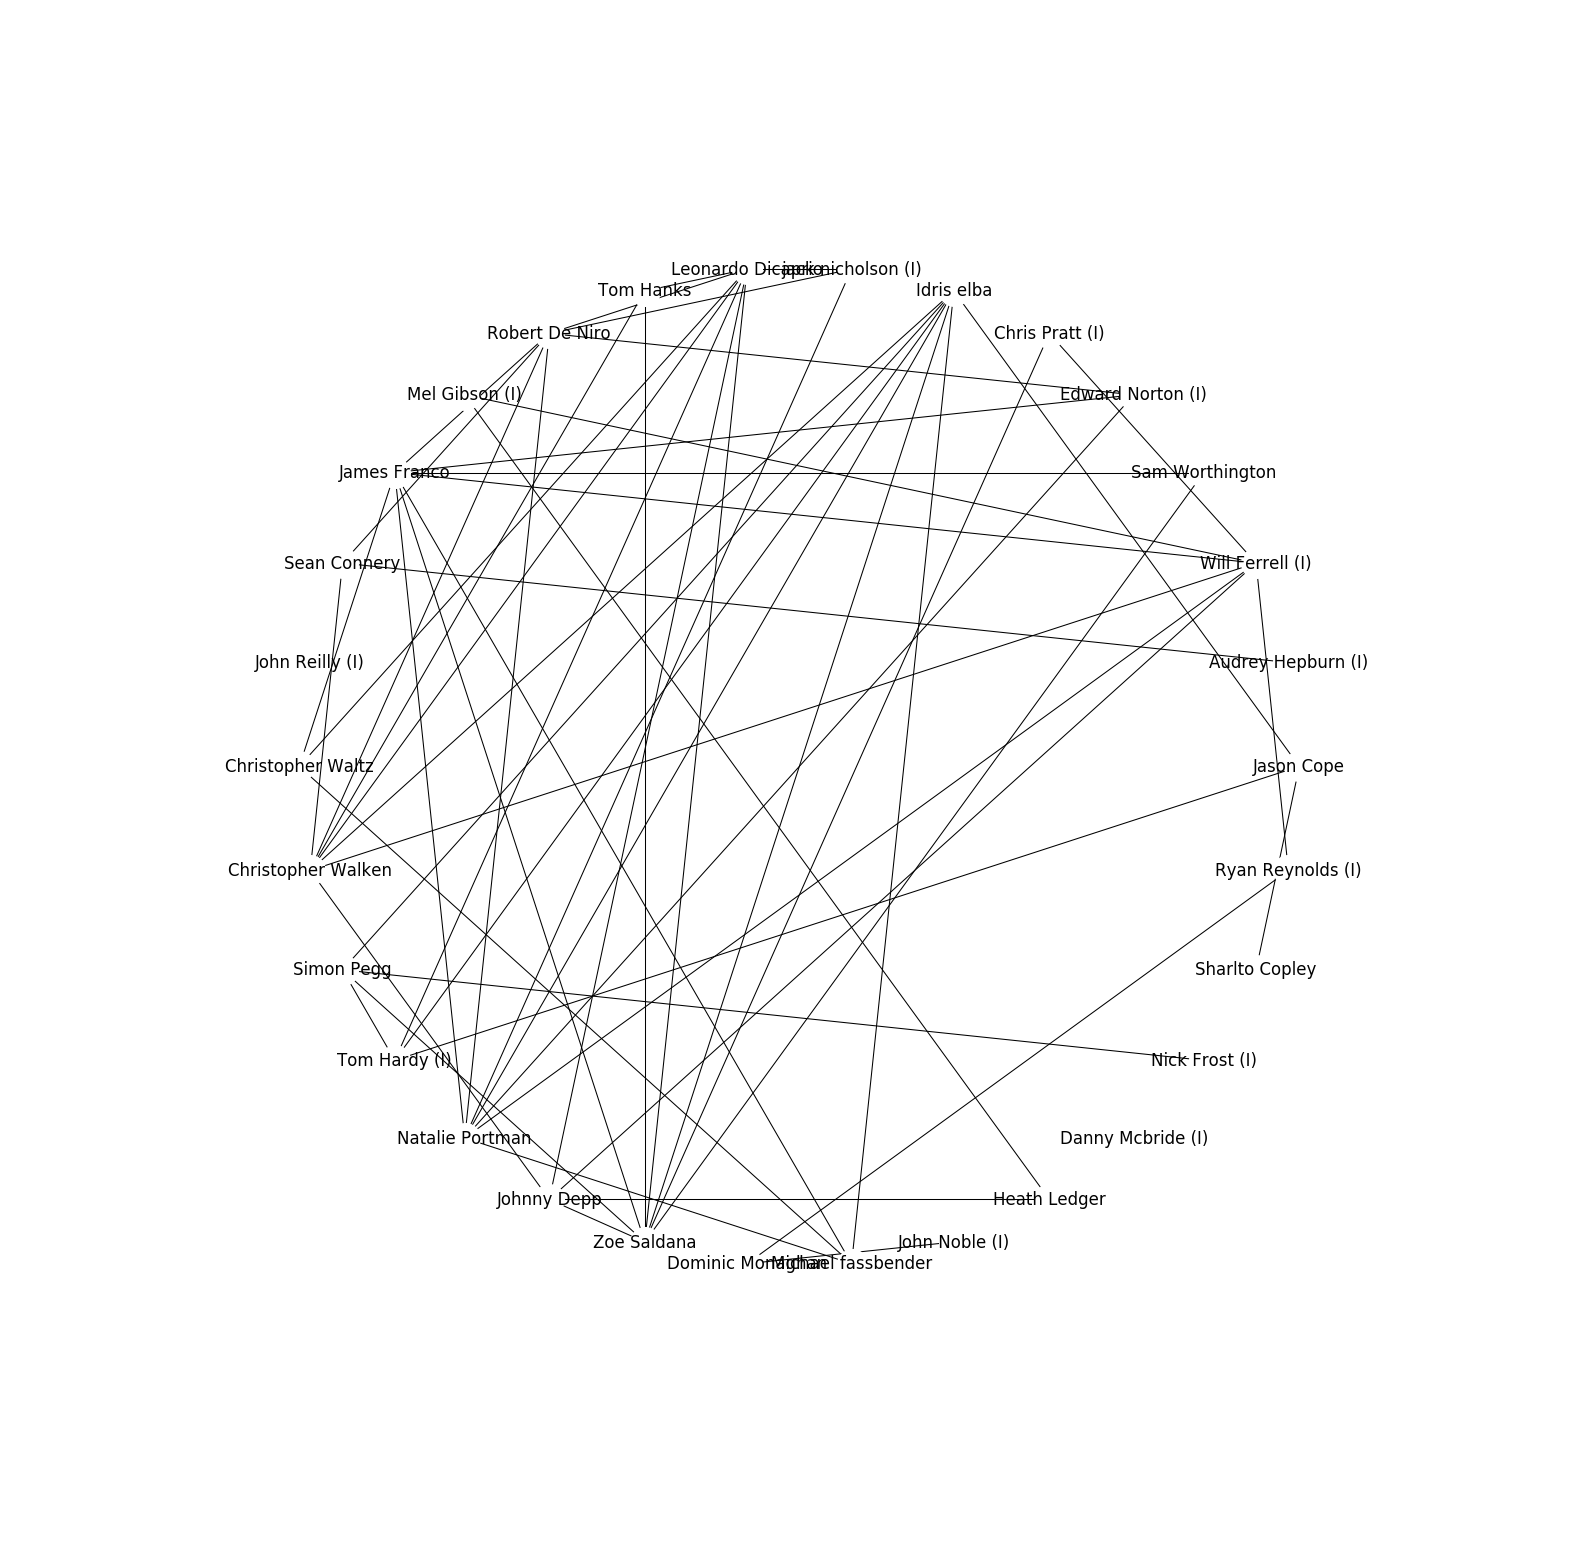

In [57]:
plt.figure(num=None, figsize = (15,15), dpi=1600);
nx.draw_circular(nx.from_dict_of_lists(saved_list),with_labels=True,node_color="#FFFFFF",node_size=500, linewidths=0, alpha=1, width=0.75)
plt.show()

In [10]:
print(saved_list)

{'Jason Cope': ['Tom Hardy (I)', 'Sharlto Copley', 'Idris elba'], 'Audrey Hepburn (I)': ['Sean Connery'], 'Will Ferrell (I)': ['Chris Pratt (I)', 'Johnny Depp', 'Natalie Portman', 'Christopher Walken', 'James Franco', 'Ryan Reynolds (I)', 'Mel Gibson (I)'], 'Sam Worthington': ['Zoe Saldana', 'James Franco'], 'Edward Norton (I)': ['Robert De Niro', 'Robert De Niro', 'Natalie Portman', 'James Franco'], 'Chris Pratt (I)': ['Zoe Saldana', 'Will Ferrell (I)'], 'Idris elba': ['Michael fassbender', 'Zoe Saldana', 'Tom Hardy (I)', 'Natalie Portman', 'Jason Cope', 'Christopher Walken', 'Simon Pegg'], 'jack nicholson (I)': ['Robert De Niro', 'Leonardo Dicaprio', 'Robert De Niro', 'Natalie Portman'], 'Leonardo Dicaprio': ['Christopher Waltz', 'Robert De Niro', 'Zoe Saldana', 'Johnny Depp', 'Tom Hardy (I)', 'Robert De Niro', 'Christopher Walken', 'jack nicholson (I)', 'Tom Hanks'], 'Tom Hanks': ['Zoe Saldana', 'Leonardo Dicaprio', 'Christopher Walken'], 'Robert De Niro': ['Leonardo Dicaprio', 'Nat

# Part 4

#### Danny Mcbride
No connections, Nv = 0, Kv = 0

Defaults to 0 since (nv == 0 || nv == 1) is true

#### Christopher Waltz
he's been with michael fassbender, leonardo dicaprio, and james franco
so Kv = 3
franco and fassbender are connected to eachother
so Nv = 1

2 * 1 / 3 * (3-1)
= 2 / 6
= 1 / 3

#### Heath Ledger
connected to both johnny depp and mel gibson
so Kv = 2
however there are no connections between any of his neighbors to eachother
so Nv = 0

2 * 0 / 2 * (2 - 1)
= 0 / 2
= 0

#### Jason Cope
connected to Sharlto Copley, Tom Hardy, and Idris Elba
so Kv = 3
Idris elba is connected to tom hard
So Nv = 1

2 * 1 / 3 * (3-1)
= 2 / 6
= 1 / 3

#### Nick Frost
Nick frost is only connected to Simon Pegg
so Kv = 1
Since kv is one Nv cannot have any value
so Nv = 0

Nv == 1 therefore the clustering coefficient for nick frost is 0

# Part 5 - individual clustering coefficients

In [58]:
for key in saved_list:
    print(str(key) + ": " + str(nx.clustering(nx.from_dict_of_lists(saved_list), key)))

Jason Cope: 0.3333333333333333
Audrey Hepburn (I): 0.0
Will Ferrell (I): 0.09523809523809523
Sam Worthington: 1.0
Edward Norton (I): 1.0
Chris Pratt (I): 0.0
Idris elba: 0.19047619047619047
jack nicholson (I): 0.6666666666666666
Leonardo Dicaprio: 0.21428571428571427
Tom Hanks: 0.6666666666666666
Robert De Niro: 0.3333333333333333
Mel Gibson (I): 0.0
James Franco: 0.25
Sean Connery: 0.3333333333333333
John Reilly (I): 0.0
Christopher Waltz: 0.3333333333333333
Christopher Walken: 0.23809523809523808
Simon Pegg: 0.3333333333333333
Tom Hardy (I): 0.3333333333333333
Natalie Portman: 0.3333333333333333
Johnny Depp: 0.3
Zoe Saldana: 0.14285714285714285
Dominic Monaghan: 0.0
Sharlto Copley: 0.0
John Noble (I): 0.0
Heath Ledger: 0.0
Danny Mcbride (I): 0.0
Nick Frost (I): 0.0
Michael fassbender: 0.5
Ryan Reynolds (I): 0.0


# Part 6 - overall clustering coefficient

In [59]:
counter = 0
total = 0
for key in saved_list:
    total += nx.clustering(nx.from_dict_of_lists(saved_list), key)
    counter += 1
print(total/counter)

0.25325396825396823


# Part 7 - central actors

as you can see in the previous cells, two individuals had a clustering coefficient of 1, Sam worthington & Edward Norton. Within their own little click they are the most central.